In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

ccl_results = np.load("../test/test_results.npz")
LB_results = np.load("../test/test_output.npz")

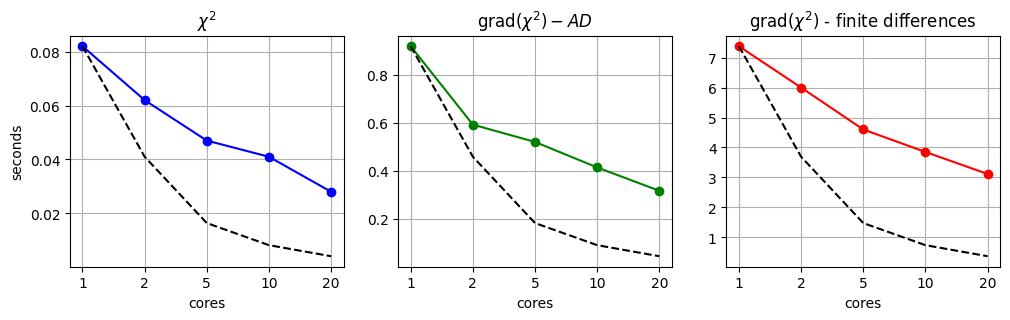

In [2]:
cores = np.array([1, 2, 5, 10, 20])
evals = np.array([0.082, 0.062, 0.047, 0.041, 0.028])
grads = np.array([0.919, 0.593, 0.521, 0.415, 0.318])
fds = np.array([7.38, 6.000, 4.6, 3.85, 3.115])

fig, axis = plt.subplots(1, 3, figsize=(12,3))
axis[0].plot(cores.astype('str'), evals, 'bo-')
axis[0].plot(cores.astype('str'), evals[0]/np.array(cores), 'k--')
axis[0].set_title(r"$\chi^2$")
axis[0].set_xlabel("cores")
axis[0].set_ylabel("seconds")
axis[0].grid(True)

axis[1].plot(cores.astype('str'), grads, 'go-')
axis[1].plot(cores.astype('str'), grads[0]/np.array(cores), 'k--')
axis[1].set_title(r"grad($\chi^2) - AD$")
axis[1].set_xlabel("cores")
axis[1].grid(True)

axis[2].plot(cores.astype('str'), fds, 'ro-')
axis[2].plot(cores.astype('str'), fds[0]/np.array(cores), 'k--')
axis[2].set_title(r"grad($\chi^2)$ - finite differences")
axis[2].set_xlabel("cores")
axis[2].grid(True)

#fig.text(.5, -.1, r" $\chi^2$ Benchmarks of LimberJack.jl for 45 parameters and 1125 multipoles", ha='center')
plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/benchmark.pdf", bbox_inches='tight')

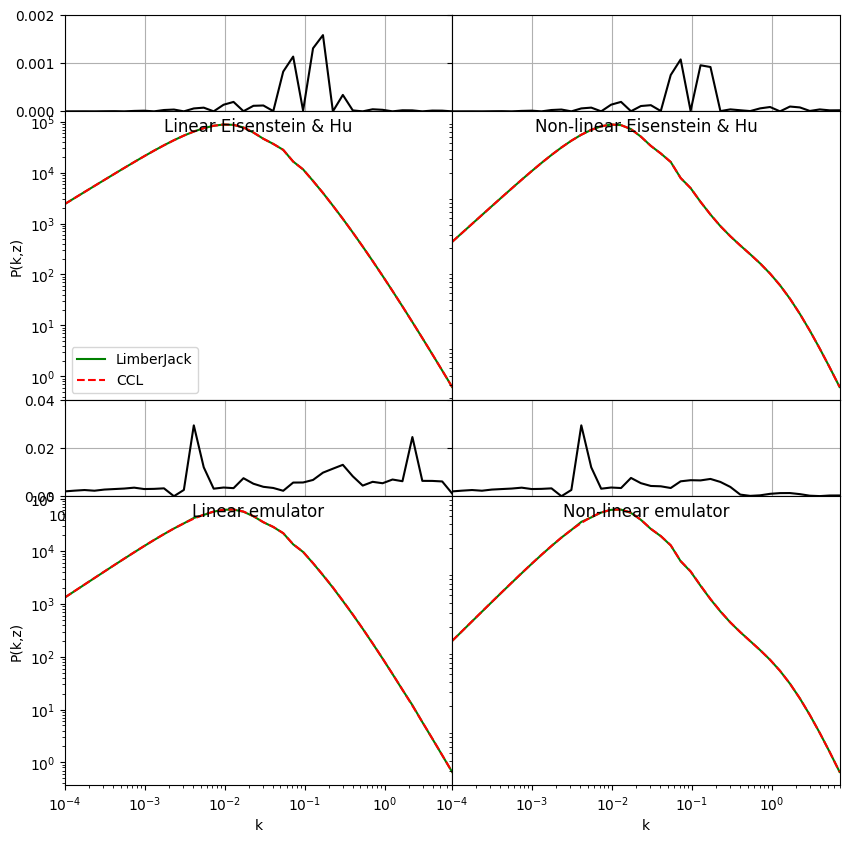

In [3]:
ls = np.load("../emulator/files.npz")["training_karr"]
fig, axis = plt.subplots(4, 2, figsize=(10,10), gridspec_kw={'height_ratios': [1, 3, 1, 3]})
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[0,0].plot(ls, abs(ccl_results["pk_EisHu"]/LB_results["pk_EisHu"]-1),
               'k-', label="CCL (classy)")
axis[0,0].set_ylim(0, 0.002)
axis[0,0].set_xscale("log")
axis[0,0].xaxis.set_ticklabels([])
axis[0,0].grid(True)
axis[0,0].set_xlim([ls[0], ls[-1]])

axis[1,0].plot(ls, LB_results["pk_EisHu"], 'g-', label="LimberJack")
axis[1,0].plot(ls, ccl_results["pk_EisHu"], 'r--', label="CCL")
axis[1,0].legend(loc=3)
axis[1,0].set_ylabel("P(k,z)")
axis[1,0].set_title("Linear Eisenstein & Hu", y=0.9)
axis[1,0].set_xscale("log")
axis[1,0].set_yscale("log")
axis[1,0].set_xlim([ls[0], ls[-1]])
axis[1,0].xaxis.set_ticklabels([])

axis[0,1].plot(ls, abs(ccl_results["pk_EisHu_nonlin"]/LB_results["pk_EisHu_nonlin"]-1),
               'k-', label="CCL")
axis[0,1].set_ylim(0, 0.002)
axis[0,1].grid(True)
axis[0,1].set_xscale("log")
axis[0,1].yaxis.set_ticklabels([])
axis[0,1].set_xlim([ls[0], ls[-1]])

axis[1,1].plot(ls, LB_results["pk_EisHu_nonlin"], 'g-')
axis[1,1].plot(ls, ccl_results["pk_EisHu_nonlin"], 'r--')
axis[1,1].set_title("Non-linear Eisenstein & Hu", y=0.9)
axis[1,1].set_xscale("log")
axis[1,1].set_yscale("log")
axis[1,1].set_yticks([])
axis[1,1].set_xlim([ls[0], ls[-1]])

axis[2,0].plot(ls, abs(ccl_results["pk_emul"]/LB_results["pk_emul"]-1),
               'k-', label="CCL")
axis[2,0].set_ylim(0, 0.04)
axis[2,0].xaxis.set_ticklabels([])
axis[2,0].set_xscale("log")
axis[2,0].grid(True)
axis[2,0].set_xlim([ls[0], ls[-1]])

axis[3,0].plot(ls, LB_results["pk_emul"], 'g-')
axis[3,0].plot(ls, ccl_results["pk_emul"], 'r--')
axis[3,0].set_ylabel("P(k,z)")
axis[3,0].set_xlabel("k")
axis[3,0].set_title("Linear emulator", y=0.9)
axis[3,0].set_xscale("log")
axis[3,0].set_yscale("log")
axis[3,0].set_xlim([ls[0], ls[-1]])

axis[2,1].plot(ls, abs(ccl_results["pk_emul_nonlin"]/LB_results["pk_emul_nonlin"]-1),
               'k-', label="CCL")
axis[2,1].set_ylim(0, 0.04)
axis[2,1].grid(True)
axis[2,1].set_xscale("log")
axis[2,1].yaxis.set_ticklabels([])
axis[2,1].set_xlim([ls[0], ls[-1]])

axis[3,1].plot(ls, LB_results["pk_emul_nonlin"], 'g-')
axis[3,1].plot(ls, ccl_results["pk_emul_nonlin"], 'r--')
axis[3,1].set_xlabel("k")
axis[3,1].set_title("Non-linear emulator", y=0.9)
axis[3,1].set_xscale("log")
axis[3,1].set_yscale("log")
axis[3,1].set_yticks([])
axis[3,1].set_xlim([ls[0], ls[-1]]);

plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/Pk_acc.pdf", bbox_inches='tight')

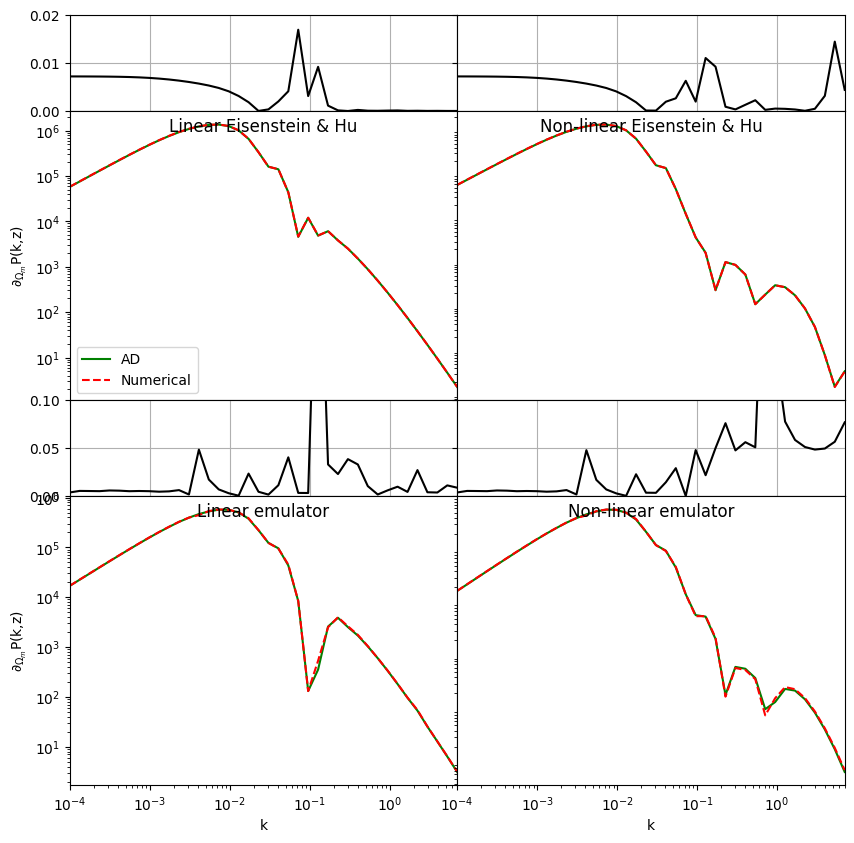

In [4]:
ls = np.load("../emulator/files.npz")["training_karr"]
fig, axis = plt.subplots(4, 2, figsize=(10,10), gridspec_kw={'height_ratios': [1, 3, 1, 3]})
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[0,0].plot(ls, abs(LB_results["lin_EisHu_autodiff"]/LB_results["lin_EisHu_num"]-1),
               'k-', label="CCL (classy)")
axis[0,0].set_ylim(0, 0.02)
axis[0,0].set_xscale("log")
axis[0,0].xaxis.set_ticklabels([])
axis[0,0].grid(True)
axis[0,0].set_xlim([ls[0], ls[-1]])

axis[1,0].plot(ls, LB_results["lin_EisHu_autodiff"], 'g-', label="AD")
axis[1,0].plot(ls, LB_results["lin_EisHu_num"], 'r--', label="Numerical")
axis[1,0].legend(loc=3)
axis[1,0].set_ylabel(r"$\partial_{\Omega_m}$P(k,z)")
axis[1,0].xaxis.set_ticklabels([])
axis[1,0].set_title("Linear Eisenstein & Hu", y=0.9)
axis[1,0].set_xscale("log")
axis[1,0].set_yscale("log")
axis[1,0].set_xlim([ls[0], ls[-1]])
axis[1,0].xaxis.set_ticklabels([])

axis[0,1].plot(ls, abs(LB_results["nonlin_EisHu_autodiff"]/LB_results["nonlin_EisHu_num"]-1),
               'k-', label="CCL")
axis[0,1].set_ylim(0, 0.02)
axis[0,1].grid(True)
axis[0,1].set_xscale("log")
axis[0,1].yaxis.set_ticklabels([])
axis[0,1].set_xlim([ls[0], ls[-1]])

axis[1,1].plot(ls, LB_results["nonlin_EisHu_autodiff"], 'g-')
axis[1,1].plot(ls, LB_results["nonlin_EisHu_num"], 'r--')
axis[1,1].set_title("Non-linear Eisenstein & Hu", y=0.9)
axis[1,1].set_xscale("log")
axis[1,1].set_yscale("log")
axis[1,1].set_yticks([])
axis[1,1].set_xlim([ls[0], ls[-1]])

axis[2,0].plot(ls, abs(LB_results["lin_emul_autodiff"]/LB_results["lin_emul_num"]-1),
               'k-', label="CCL")
axis[2,0].set_ylim(0, 0.1)
axis[2,0].xaxis.set_ticklabels([])
axis[2,0].set_xscale("log")
axis[2,0].grid(True)
axis[2,0].set_xlim([ls[0], ls[-1]])
axis[2,0].xaxis.set_ticklabels([])

axis[3,0].plot(ls, LB_results["lin_emul_autodiff"], 'g-')
axis[3,0].plot(ls, LB_results["lin_emul_num"], 'r--')
axis[3,0].set_ylabel(r"$\partial_{\Omega_m}$P(k,z)")
axis[3,0].set_xlabel("k")
axis[3,0].set_title("Linear emulator", y=0.9)
axis[3,0].set_xscale("log")
axis[3,0].set_yscale("log")
axis[3,0].set_xlim([ls[0], ls[-1]])

axis[2,1].plot(ls, abs(LB_results["nonlin_emul_autodiff"]/LB_results["nonlin_emul_num"]-1),
               'k-', label="CCL")
axis[2,1].set_ylim(0, 0.1)
axis[2,1].grid(True)
axis[2,1].set_xscale("log")
axis[2,1].yaxis.set_ticklabels([])
axis[2,1].set_xlim([ls[0], ls[-1]])

axis[3,1].plot(ls, LB_results["nonlin_emul_autodiff"], 'g-')
axis[3,1].plot(ls, LB_results["nonlin_emul_num"], 'r--')
axis[3,1].set_xlabel("k")
axis[3,1].set_title("Non-linear emulator", y=0.9)
axis[3,1].set_xscale("log")
axis[3,1].set_yscale("log")
axis[3,1].set_yticks([])
axis[3,1].set_xlim([ls[0], ls[-1]]);

plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/diff_Pk_acc.pdf", bbox_inches='tight')

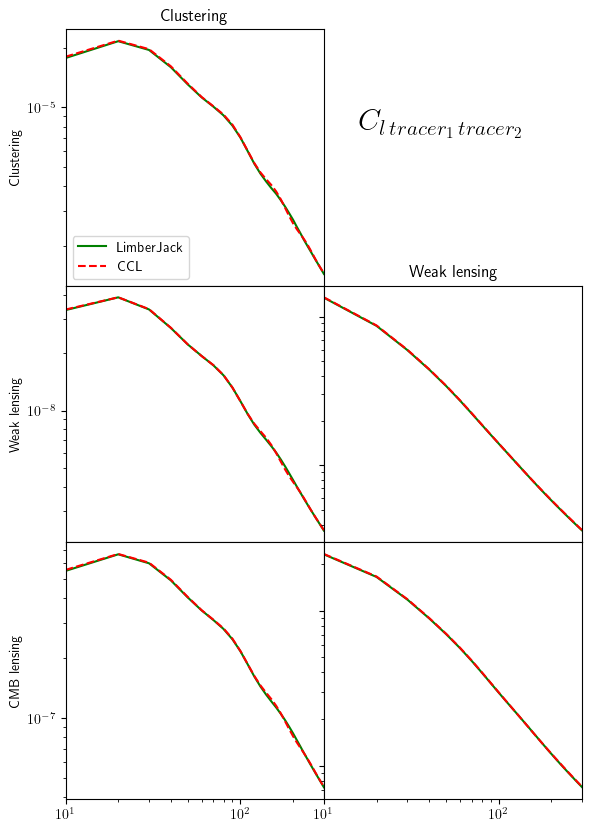

In [39]:
ls = np.linspace(10, 300, 30)
fig, axis = plt.subplots(3, 3, figsize=(10,10))
fig.delaxes(axis[0,1])
fig.delaxes(axis[0,2])
fig.delaxes(axis[1,2])
fig.delaxes(axis[2,2])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.suptitle(r'$C_{l \, tracer_1 \, tracer_2}$',
             y=0.8, fontsize=22, fontweight="bold")

axis[0,0].plot(ls, LB_results["cl_gg_camb_nonlin"], 'g-', label="LimberJack")
axis[0,0].plot(ls, ccl_results["cl_gg_camb_nonlin"], 'r--', label="CCL")
axis[0,0].legend(loc=3)
axis[0,0].set_ylabel("Clustering")
axis[0,0].xaxis.set_ticklabels([])
axis[0,0].set_title("Clustering")
axis[0,0].set_xscale("log")
axis[0,0].set_yscale("log")
axis[0,0].set_xlim([ls[0], ls[-1]])
axis[0,0].xaxis.set_ticklabels([])

axis[1,0].plot(ls, LB_results["cl_gs_camb_nonlin"], 'g-', label="LimberJack")
axis[1,0].plot(ls, ccl_results["cl_gs_camb_nonlin"], 'r--', label="CCL")
axis[1,0].set_ylabel("Weak lensing")
axis[1,0].xaxis.set_ticklabels([])
axis[1,0].set_xscale("log")
axis[1,0].set_yscale("log")
axis[1,0].set_xlim([ls[0], ls[-1]])
axis[1,0].xaxis.set_ticklabels([])

axis[1,1].plot(ls, LB_results["cl_ss_camb_nonlin"], 'g-', label="LimberJack")
axis[1,1].plot(ls, ccl_results["cl_ss_camb_nonlin"], 'r--', label="CCL")
axis[1,1].set_title("Weak lensing")
axis[1,1].set_xscale("log")
axis[1,1].set_yscale("log")
axis[1,1].set_xlim([ls[0], ls[-1]])
axis[1,1].xaxis.set_ticklabels([])
axis[1,1].yaxis.set_ticklabels([])


axis[2,0].plot(ls, LB_results["cl_gk_camb_nonlin"], 'g-', label="LimberJack")
axis[2,0].plot(ls, ccl_results["cl_gk_camb_nonlin"], 'r--', label="CCL")
axis[2,0].set_ylabel("CMB lensing")
axis[2,0].xaxis.set_ticklabels([])
axis[2,0].set_xscale("log")
axis[2,0].set_yscale("log")
axis[2,0].set_xlim([ls[0], ls[-1]])

axis[2,1].plot(ls, LB_results["cl_sk_camb_nonlin"], 'g-', label="LimberJack")
axis[2,1].plot(ls, ccl_results["cl_sk_camb_nonlin"], 'r--', label="CCL")
axis[2,1].set_xscale("log")
axis[2,1].set_yscale("log")
axis[2,1].set_xlim([ls[0], ls[-1]])
axis[2,1].yaxis.set_ticklabels([])

plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/cls_acc.pdf", bbox_inches='tight')

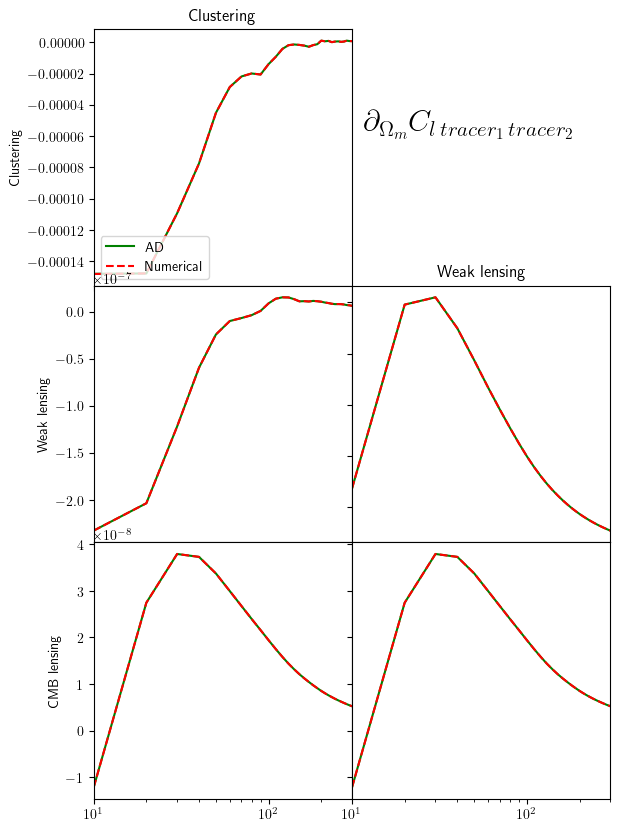

In [41]:
ls = np.linspace(10, 300, 30)
fig, axis = plt.subplots(3, 3, figsize=(10,10))
fig.delaxes(axis[0,1])
fig.delaxes(axis[0,2])
fig.delaxes(axis[1,2])
fig.delaxes(axis[2,2])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.suptitle(r'$\partial_{\Omega_m} C_{l \, tracer_1 \, tracer_2 }$',
             y=0.8, fontsize=22)

axis[0,0].plot(ls, LB_results["Cl_gg_autodiff"], 'g-', label="AD")
axis[0,0].plot(ls, LB_results["Cl_gg_num"], 'r--', label="Numerical")
axis[0,0].legend(loc=3)
axis[0,0].set_ylabel("Clustering")
axis[0,0].xaxis.set_ticklabels([])
axis[0,0].set_title("Clustering")
axis[0,0].set_xscale("log")
#axis[0,0].set_yscale("log")
axis[0,0].set_xlim([ls[0], ls[-1]])
axis[0,0].xaxis.set_ticklabels([])

axis[1,0].plot(ls, LB_results["Cl_gs_autodiff"], 'g-', label="LimberJack")
axis[1,0].plot(ls, LB_results["Cl_gs_num"], 'r--', label="CCL")
axis[1,0].set_ylabel("Weak lensing")
axis[1,0].xaxis.set_ticklabels([])
axis[1,0].set_xscale("log")
#axis[1,0].set_yscale("log")
axis[1,0].set_xlim([ls[0], ls[-1]])
axis[1,0].xaxis.set_ticklabels([])

axis[1,1].plot(ls, LB_results["Cl_ss_autodiff"], 'g-', label="LimberJack")
axis[1,1].plot(ls, LB_results["Cl_ss_num"], 'r--', label="CCL")
axis[1,1].set_title("Weak lensing")
axis[1,1].set_xscale("log")
#axis[1,1].set_yscale("log")
axis[1,1].set_xlim([ls[0], ls[-1]])
axis[1,1].xaxis.set_ticklabels([])
axis[1,1].yaxis.set_ticklabels([])


axis[2,0].plot(ls, LB_results["Cl_gk_autodiff"], 'g-', label="LimberJack")
axis[2,0].plot(ls, LB_results["Cl_gk_num"], 'r--', label="CCL")
axis[2,0].set_ylabel("CMB lensing")
axis[2,0].xaxis.set_ticklabels([])
axis[2,0].set_xscale("log")
#axis[2,0].set_yscale("log")
axis[2,0].set_xlim([ls[0], ls[-1]])

axis[2,1].plot(ls, LB_results["Cl_sk_autodiff"], 'g-', label="LimberJack")
axis[2,1].plot(ls, LB_results["Cl_sk_num"], 'r--', label="CCL")
axis[2,1].set_xscale("log")
#axis[2,1].set_yscale("log")
axis[2,1].set_xlim([ls[0], ls[-1]])
axis[2,1].yaxis.set_ticklabels([])

plt.savefig("/mnt/c/Users/jaime/Desktop/Growth_with_RSDs/diff_cls_acc.pdf", bbox_inches='tight')